#Team members
Shubham Shailesh Tamhane

Arunaggiri

In [ ]:
!pip install emoji
import nltk
nltk.download("popular")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the necessary libraries
import pandas as pd

#Load the training data
df = pd.read_excel('/content/drive/MyDrive/Capstone_project/training_data.xlsx')

## Section - A

<b>a) Create a table that contains information on minimum, average, median, and maximum for the
following: tweet length (#characters and #words) (text column), hashtag length (#characters
and #words) (hashtags column)

In [5]:
# Clean the data by removing any null values
df['full_text'] = df['full_text'].fillna('')
df['hashtags'] = df['hashtags'].fillna('')

# Calculate tweet length in terms of characters and words for the 'full_text' column
df['tweet_char_length'] = df['full_text'].str.len()
df['tweet_word_length'] = df['full_text'].str.split().apply(len)

# Calculate hashtag length in terms of characters and words for the 'hashtags' column
df['hashtag_char_length'] = df['hashtags'].str.len()
df['hashtag_word_length'] = df['hashtags'].str.split().apply(len)

In [6]:
# Calculate statistics for tweet length
tweet_char_stats = df['tweet_char_length'].describe().loc[['min', 'mean', '50%', 'max']]
tweet_word_stats = df['tweet_word_length'].describe().loc[['min', 'mean', '50%', 'max']]

# Calculate statistics for hashtag length
hashtag_char_stats = df['hashtag_char_length'].describe().loc[['min', 'mean', '50%', 'max']]
hashtag_word_stats = df['hashtag_word_length'].describe().loc[['min', 'mean', '50%', 'max']]

# Combine results into a table
table = pd.concat([tweet_char_stats, tweet_word_stats, hashtag_char_stats, hashtag_word_stats], axis=1)
table.columns = ['Tweet Char Length', 'Tweet Word Length', 'Hashtag Char Length', 'Hashtag Word Length']

In [7]:
# Combine results into a DataFrame
stats_data = {
    'Metrics': ['Min', 'Mean', 'Median', 'Max'],
    'Tweet Char Length': tweet_char_stats.values,
    'Tweet Word Length': tweet_word_stats.values,
    'Hashtag Char Length': hashtag_char_stats.values,
    'Hashtag Word Length': hashtag_word_stats.values
}
table_df = pd.DataFrame(stats_data)

display(table_df)

,Metrics,Tweet Char Length,Tweet Word Length,Hashtag Char Length,Hashtag Word Length
0,Min,4.000000,1.000000,0.000000,0.000000
1,Mean,167.304121,20.141102,4.395594,0.492197
2,Median,156.000000,19.000000,0.000000,0.000000
3,Max,2994.000000,89.000000,145.000000,16.000000


**b) Find the top ten most commonly used hashtags (hashtags column) in each country separately.
Then, create pie charts (one pie chart per country) which show the distribution of these ten most
commonly used hashtags for each country. Do you observe any patterns? What are the meanings
/ interpretations of the hashtags you have identified? Write your findings in the report. (Add the
pie charts to the report.)**

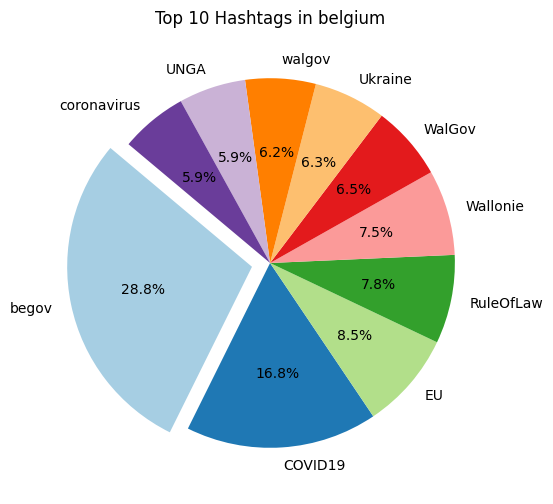

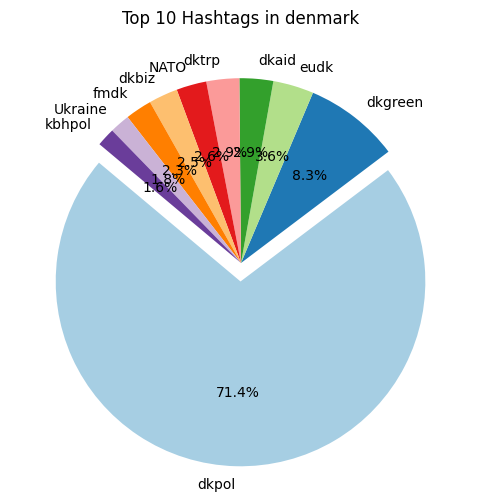

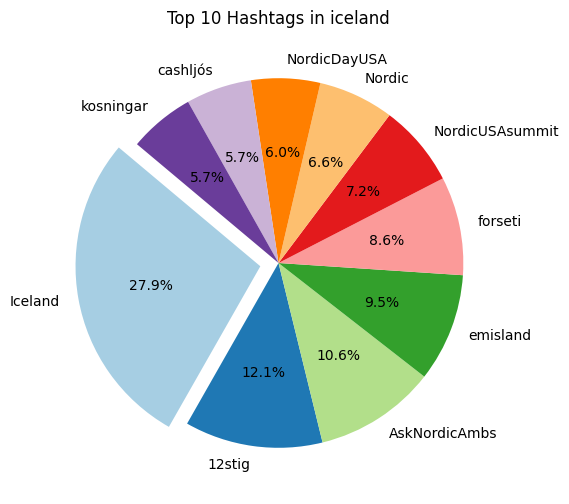

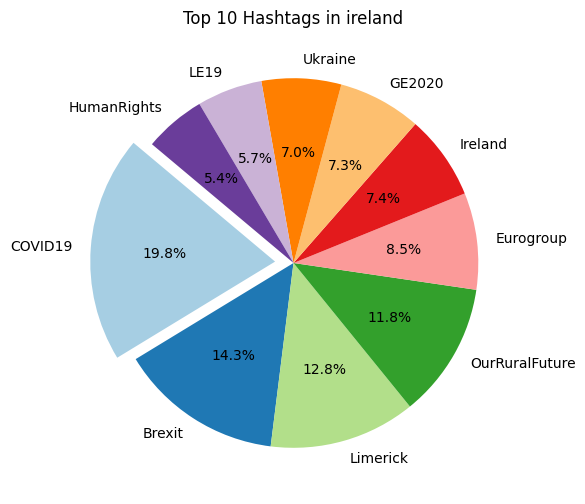

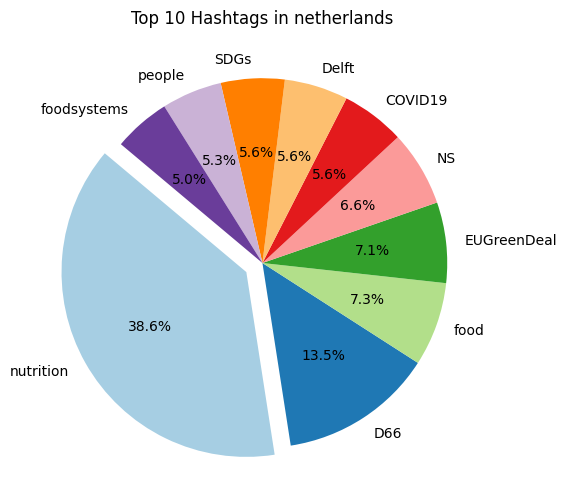

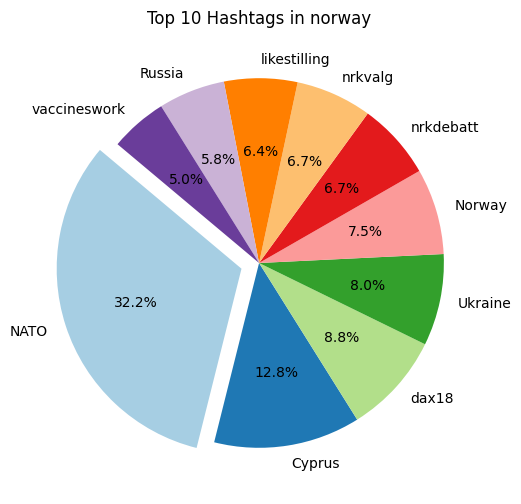

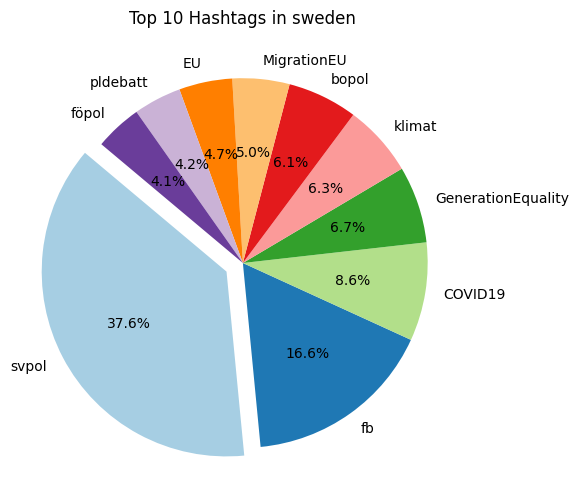

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data from an Excel file
df = pd.read_excel('/content/drive/MyDrive/Capstone_project/training_data.xlsx')

# Split the 'hashtags' column to create a new row for each hashtag
hashtags_split = df['hashtags'].str.split().explode()

# Group by country and hashtag, then count the occurrences
top_hashtags_by_country = (hashtags_split.groupby([df['country_user'], hashtags_split])
                          .size()
                          .unstack(fill_value=0)
                          .stack()
                          .reset_index(name='count')
                          .sort_values(by=['country_user', 'count'], ascending=[True, False])
                          )

# Filter only top 10 hashtags for each country
top_10_hashtags = top_hashtags_by_country.groupby('country_user').head(10)

# Plot pie chart for each country
countries = top_10_hashtags['country_user'].unique()
for country in countries:
    country_data = top_10_hashtags[top_10_hashtags['country_user'] == country]
    plt.figure(figsize=(10, 6))
    plt.pie(country_data['count'], labels=country_data['hashtags'], autopct='%1.1f%%', startangle=140,
            colors=plt.cm.Paired.colors, explode=[0.1] + [0]*(len(country_data['count'])-1))
    plt.title(f'Top 10 Hashtags in {country}')
    plt.show()

**1. Observed Patterns:**
Common Topics: Certain hashtags appear in multiple countries, indicating common concerns or topics of discussion:

- COVID19 is a recurring hashtag, highlighting the pandemic's widespread impact. It appears in the lists for Belgium, Ireland, Netherlands, and Sweden.
- Ukraine is mentioned in Belgium, Denmark, Ireland, and Norway. This could indicate geopolitical discussions or concerns involving Ukraine.
- NATO is highlighted in both Denmark and Norway, suggesting military or alliance-based conversations in these countries.
- EU appears in Belgium and Sweden, hinting at discussions related to the European Union.

**Local and National Interests:**

Each country also seems to have specific hashtags that might relate to internal politics, local events, or culturally specific matters.

- Belgium: begov, Wallonie, WalGov and walgov indicate discussions related to the Belgian government and the Walloon region.
- Denmark: dkpol, dkgreen, eudk, dkaid all have the prefix dk, which generally refers to Denmark in online discourse.
- Iceland has a number of distinct hashtags such as 12stig, AskNordicAmbs, and emisland that may be specific to Icelandic events or cultural discussions.
- Ireland: Brexit, Limerick, and OurRuralFuture hint at matters relevant to Ireland specifically, including Brexit's impact and discussions about rural Ireland.
- Netherlands: nutrition, D66, food, and EUGreenDeal suggest topics ranging from health and nutrition to political parties (D66 is a Dutch political party) and EU policies.
- Norway: Cyprus, dax18, nrkdebatt, and likestilling could be related to specific events, debates, or concerns specific to Norway.
- Sweden: svpol, fb, GenerationEquality, klimat, and bopol may touch on political, environmental, and equality discussions in Sweden.

**2. Interpretations:**

- COVID19: This is in reference to the pandemic caused by the SARS-CoV-2 virus. The widespread nature of this hashtag showcases the global impact and concern around this topic.

- Ukraine: Could refer to any recent geopolitical events, situations, or discussions involving Ukraine. Given its appearance in multiple countries, there might have been European-wide discussions or concerns about Ukraine during this period.

- NATO: The North Atlantic Treaty Organization, a military alliance primarily between North America and Europe. Conversations may revolve around defense matters, alliance decisions, or geopolitical events.

- EU: Refers to the European Union, indicating discussions about EU policies, decisions, or matters that affect member states.

- Country-specific hashtags: These could revolve around national politics, policies, local events, or culturally significant matters. To understand the depth of each hashtag, one might need to dive deeper into the specific content of the tweets or the context in which these hashtags are most frequently used.

In conclusion, the data gives an overview of the pressing issues, concerns, or discussions in each of these countries. The blend of global issues like the pandemic with localized matters paints a comprehensive picture of the discourse in these regions.

**Create a stacked bar chart (one stacked bar per country) that shows the percentage of political
views associated with each country. [Create normalized bars to show percentages: minimum
should be 0, maximum should be 1 (or 0% and 100%)].**

In [10]:
# Calculations for full_text column
df['text_length_characters'] = df['full_text'].str.len()
df['text_length_words'] = df['full_text'].str.split().str.len()

# Calculations for hashtags column
df['hashtags_length_characters'] = df['hashtags'].str.len()
df['hashtags_length_words'] = df['hashtags'].str.split().str.len()

# Create the table
table = pd.DataFrame({
    "Tweet (#characters)": [df['text_length_characters'].min(), df['text_length_characters'].mean(), df['text_length_characters'].median(), df['text_length_characters'].max()],
    "Tweet (#words)": [df['text_length_words'].min(), df['text_length_words'].mean(), df['text_length_words'].median(), df['text_length_words'].max()],
    "Hashtags (#characters)": [df['hashtags_length_characters'].min(), df['hashtags_length_characters'].mean(), df['hashtags_length_characters'].median(), df['hashtags_length_characters'].max()],
    "Hashtags (#words)": [df['hashtags_length_words'].min(), df['hashtags_length_words'].mean(), df['hashtags_length_words'].median(), df['hashtags_length_words'].max()]
}, index=["Min", "Average", "Median", "Max"])

display(table)

,Tweet (#characters),Tweet (#words),Hashtags (#characters),Hashtags (#words)
Min,4.000000,1.000000,1.000000,1.000000
Average,167.304121,20.141102,14.089948,1.577724
Median,156.000000,19.000000,11.000000,1.000000
Max,2994.000000,89.000000,145.000000,16.000000


### Visualization of Political Views by Country

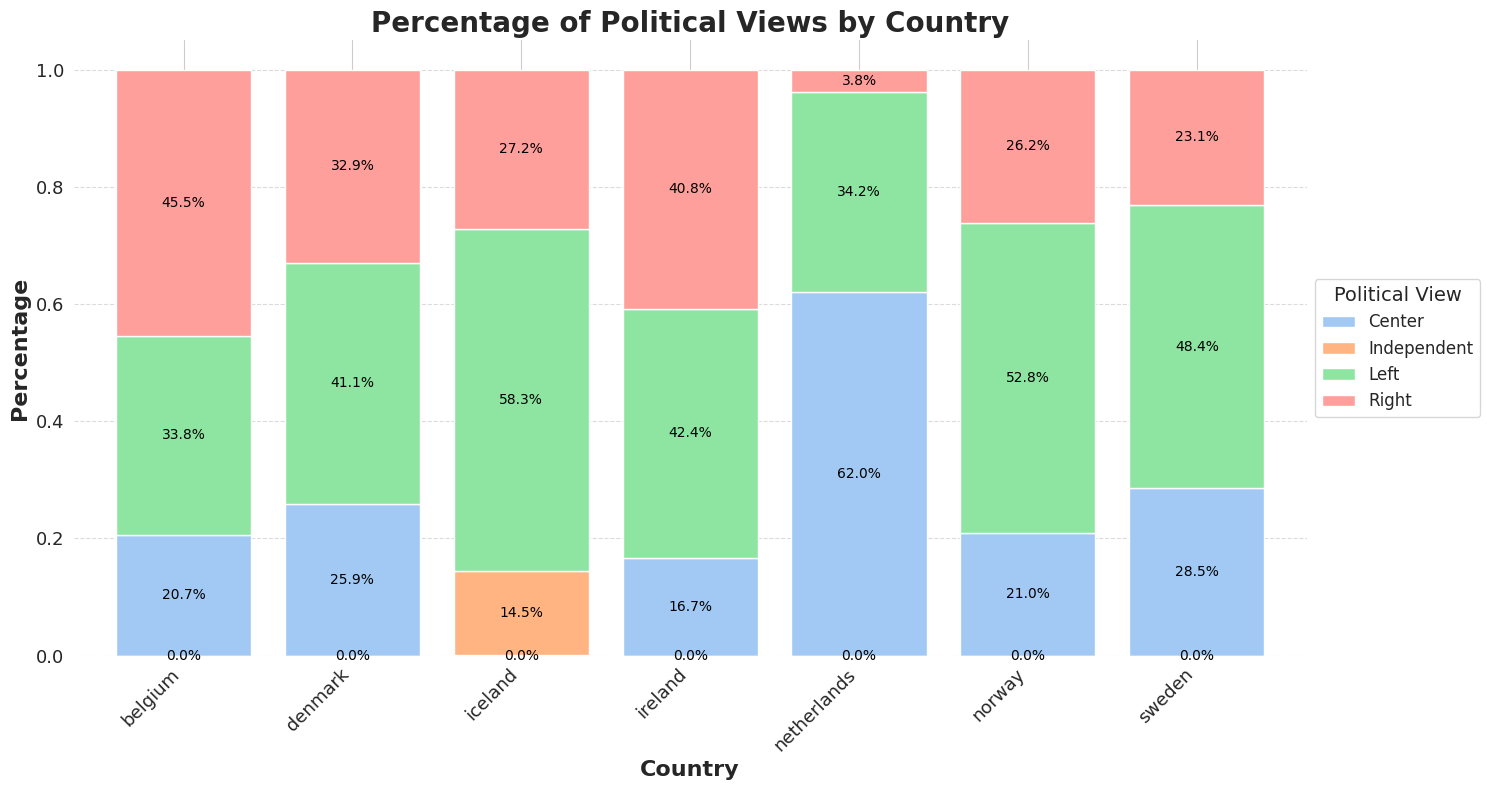

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by country and political view, then unstack to get the values for each political view as columns
pol_view = df.groupby(['country_user', 'pol_spec_user']).size().unstack().fillna(0)

# Normalize the values by dividing each value by the sum of the rows
pol_view_normalized = pol_view.div(pol_view.sum(axis=1), axis=0)

# Setting up style and color palette
sns.set_style("whitegrid")
colors = sns.color_palette("pastel", n_colors=pol_view_normalized.columns.size)

# Create Stacked Bar Chart
fig, ax = plt.subplots(figsize=(15, 8))
pol_view_normalized.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)

# Adding details to the plot
plt.title("Percentage of Political Views by Country", fontsize=20, weight='bold')
plt.ylabel("Percentage", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title="Political View", fontsize=12, title_fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

# Adding percentage annotations
for idx, rect in enumerate(ax.patches):
    left, bottom, width, height = rect.get_bbox().bounds
    country = pol_view_normalized.index[idx // len(pol_view_normalized.columns)]
    pol_view = pol_view_normalized.columns[idx % len(pol_view_normalized.columns)]
    total_height = pol_view_normalized.loc[country].sum()
    percentage = '{:.1%}'.format(height / total_height)
    plt.text(left + width/2, bottom + height/2, percentage, ha='center', va='center', fontsize=10, color='black')

# Tweaking the layout
sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Interpretations

**Dominant Political Views:**

Netherlands: The dominant political view is 'Center' with around 62% of the data.
Iceland: The dominant political view is 'Left' with roughly 58%.
Norway: The dominant political view is 'Left' with about 52.77%.

**Countries with Balanced Views:**

- Belgium: The political views are quite balanced between 'Left' (33.83%) and 'Right' (45.49%).
- Denmark: Here too, there's a balance with 'Left' being around 41.12% and 'Center' around 25.93%.
- Sweden: The balance is between 'Left' (48.36%) and 'Center' (28.53%).

**Least Represented Views:**

- Independent: This political view is notably less represented in most countries, with only Iceland having a noticeable 14.49% representation. All other countries have 0% representation for 'Independent'.
- Right in Netherlands: Surprisingly, only 3.80% of the data from the Netherlands is represented as 'Right'.

**General Observation:**

- The 'Center' and 'Left' views tend to be more prevalent across the listed countries.
- The 'Independent' view is notably absent in most countries, suggesting that either this view is genuinely less prevalent, or it might not be as commonly identified or captured in the data you're working with.

**Specific Observations:**

- Iceland: It's interesting that Iceland has a significant 'Left' representation but almost no 'Center' (just 0.04%).
- Ireland: 'Left' (42.44%) and 'Right' (40.81%) views are almost equally distributed, hinting at a balanced political landscape.

**Conclusions:**

The political landscape of these countries, as depicted by this data, is diverse. While some countries lean heavily towards a particular view, others have a more balanced distribution. The almost universal lack of representation for the 'Independent' view might warrant further investigation to determine if this is a genuine reflection of the political landscape or a result of data collection methods.

**d) Create a stacked bar chart that shows the distribution of genders by country. [Create normalized bars to show percentages: minimum should be 0, maximum should be 1 (or 0% and 100%)]. Interpret your findings.**

In [12]:
# Group by country and gender, then unstack:
gender_dist = df.groupby(['country_user', 'gender_user']).size().unstack().fillna(0)

# Normalize the values:
gender_dist_normalized = gender_dist.div(gender_dist.sum(axis=1), axis=0)

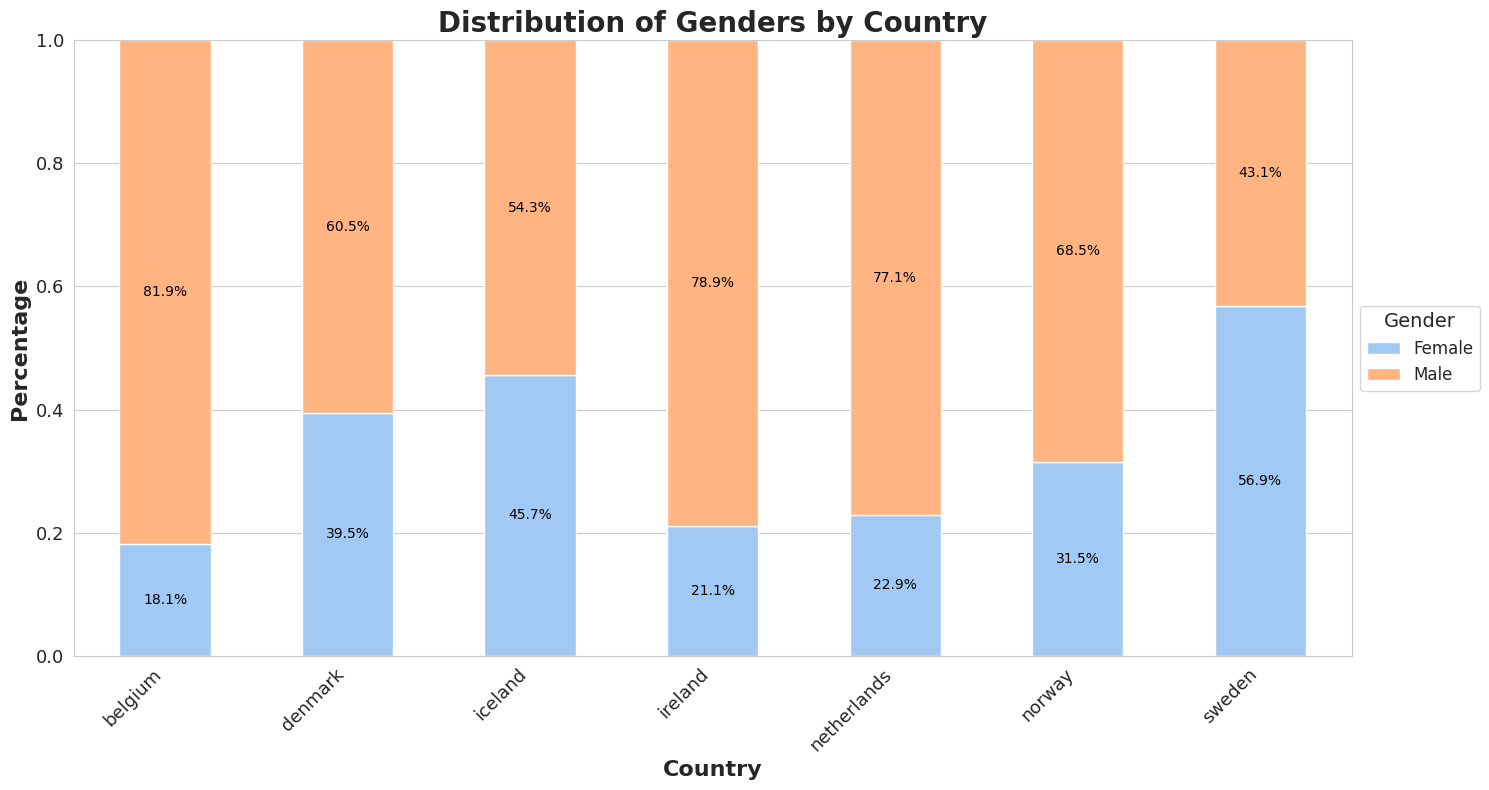

In [13]:
import seaborn as sns

sns.set_style("whitegrid")

# Using a harmonious color palette from seaborn
palette = sns.color_palette("pastel")

gender_dist_normalized.plot(kind='bar', stacked=True, figsize=(15, 8), color=palette)

# Adding details to the plot
plt.title("Distribution of Genders by Country", fontsize=20, weight='bold')
plt.ylabel("Percentage", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=16, weight='bold')
plt.xticks(fontsize=13, rotation=45, ha="right")
plt.yticks(fontsize=13)
plt.legend(title="Gender", fontsize=12, title_fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

# Adding percentage annotations
for idx, rect in enumerate(plt.gca().patches):
    left, bottom, width, height = rect.get_bbox().bounds
    country = gender_dist_normalized.index[idx // len(gender_dist_normalized.columns)]
    gender = gender_dist_normalized.columns[idx % len(gender_dist_normalized.columns)]
    total_height = gender_dist_normalized.loc[country].sum()
    percentage = '{:.1%}'.format(height / total_height)
    plt.text(left + width/2, bottom + height/2, percentage, ha='center', va='center', fontsize=10, color='black')

plt.ylim(0, 1)  # Ensure that the y-axis values range between 0 and 1
plt.tight_layout()
plt.show()

## Interpretation

Belgium: Here, we noticed a male-heavy distribution, with males accounting for a dominant 81.9% and females forming 18.1% of the total.  
Denmark: Denmark showed a more balanced gender distribution, although males (60.5%) still outnumber females (39.5%).  
Iceland: Iceland is nearing a balanced representation with females at 45.7% and males slightly higher at 54.3%.  
Ireland: This country follows a similar trend to Belgium with a high male representation of 78.9%, whereas females constitute 21.1%.  
Netherlands: The distribution here is skewed towards males with 77.1%, with females accounting for 22.9%.  
Norway: Norway sees 68.5% males and 31.5% females, again leaning towards male predominance.  
Sweden: Interestingly, Sweden breaks from the pattern observed in most other countries. Here, females take the lead with 56.9%, and males form 43.1% of the representation.  

# Section B

**a) Write a ‘text cleaner’ function that does the following in the full_text column: (i) remove stopwords, (ii) remove all words that are shorter than 3 characters, (iii) remove all links (starting with http), (iv) remove emojis, (v) remove punctuation. Attach the code you wrote to the lemmatizer.py file in the project folder. Run the lemmatizer function and create ‘cleaned and lemmatized’ version of text column. (You can name the new column as text_clean). After the cleaning, expand the table you have created in Section A) by calculating minimum, average, median, and maximum for the newly created text_clean column (#characters and #words)**

In [14]:
import re
import emoji
import nltk
from nltk.corpus import stopwords

# Download the stopwords list
nltk.download('stopwords')

# Load stopwords for the relevant languages
languages = ['english', 'dutch', 'danish', 'norwegian', 'swedish']

stop_words = set()
for lang in languages:
    stop_words.update(stopwords.words(lang))

def tweet_cleaner(text):
    # decode byte string
    if text.startswith("b'") or text.startswith('b"'):
        text = text[1:].strip("'\"")
        try:
            text = bytes(text, "latin-1").decode("unicode_escape").encode('latin-1').decode('utf-8')
        except:
            pass

    # Demojize: Convert emojis to their word representation
    text = emoji.demojize(text)

    # Remove word representations of emojis
    emoji_pattern = re.compile(r'(:[a-z_]+:)') # Matches ":word_here:"
    text = emoji_pattern.sub('', text)

    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Handle RT prefix
    text = re.sub(r'^RT[\s]+', '', text)

    # Remove all non-word characters (everything except numbers and letters)
    text = re.sub(r'[^\w\s]', '', text)

    # Remove non-English characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Lowercasing
    text = text.lower()

    # Remove stopwords and words shorter than 3 characters
    text = ' '.join([word for word in text.split() if word not in stop_words and len(word) > 2])

    # Handle whitespace
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)

    return text

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

##Tags the words in the tweets
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return(wordnet.ADJ)
    elif nltk_tag.startswith('V'):
        return(wordnet.VERB)
    elif nltk_tag.startswith('N'):
        return(wordnet.NOUN)
    elif nltk_tag.startswith('R'):
        return(wordnet.ADV)
    else:
        return(None)

##Lemmatizes the words in tweets and returns the cleaned and lemmatized tweet
def lemmatize_tweet(tweet):
    #tokenize the tweet and find the POS tag for each token
    tweet = tweet_cleaner(tweet) #tweet_cleaner() will be the function you will write
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(tweet))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_tweet = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_tweet.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_tweet.append(lemmatizer.lemmatize(word, tag))
    return(" ".join(lemmatized_tweet))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using the code in the following link6
, perform LDA (i) and Non-negative Matrix Factorization (ii)
for topic analysis. Please use the text_clean column you have created above. Set the number of
clusters/topics to 10 (ten) and extract the topics in an unsupervised manner. Adjust any
parameters as you see fit. Analyze the results. Compare the results of both models. Interpret your
findings and add your findings to the report. (5 points)

Loading dataset...
Extracting tf-idf features for NMF...
done in 8.795s.
Extracting tf features for LDA...
done in 10.695s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


done in 84.281s.


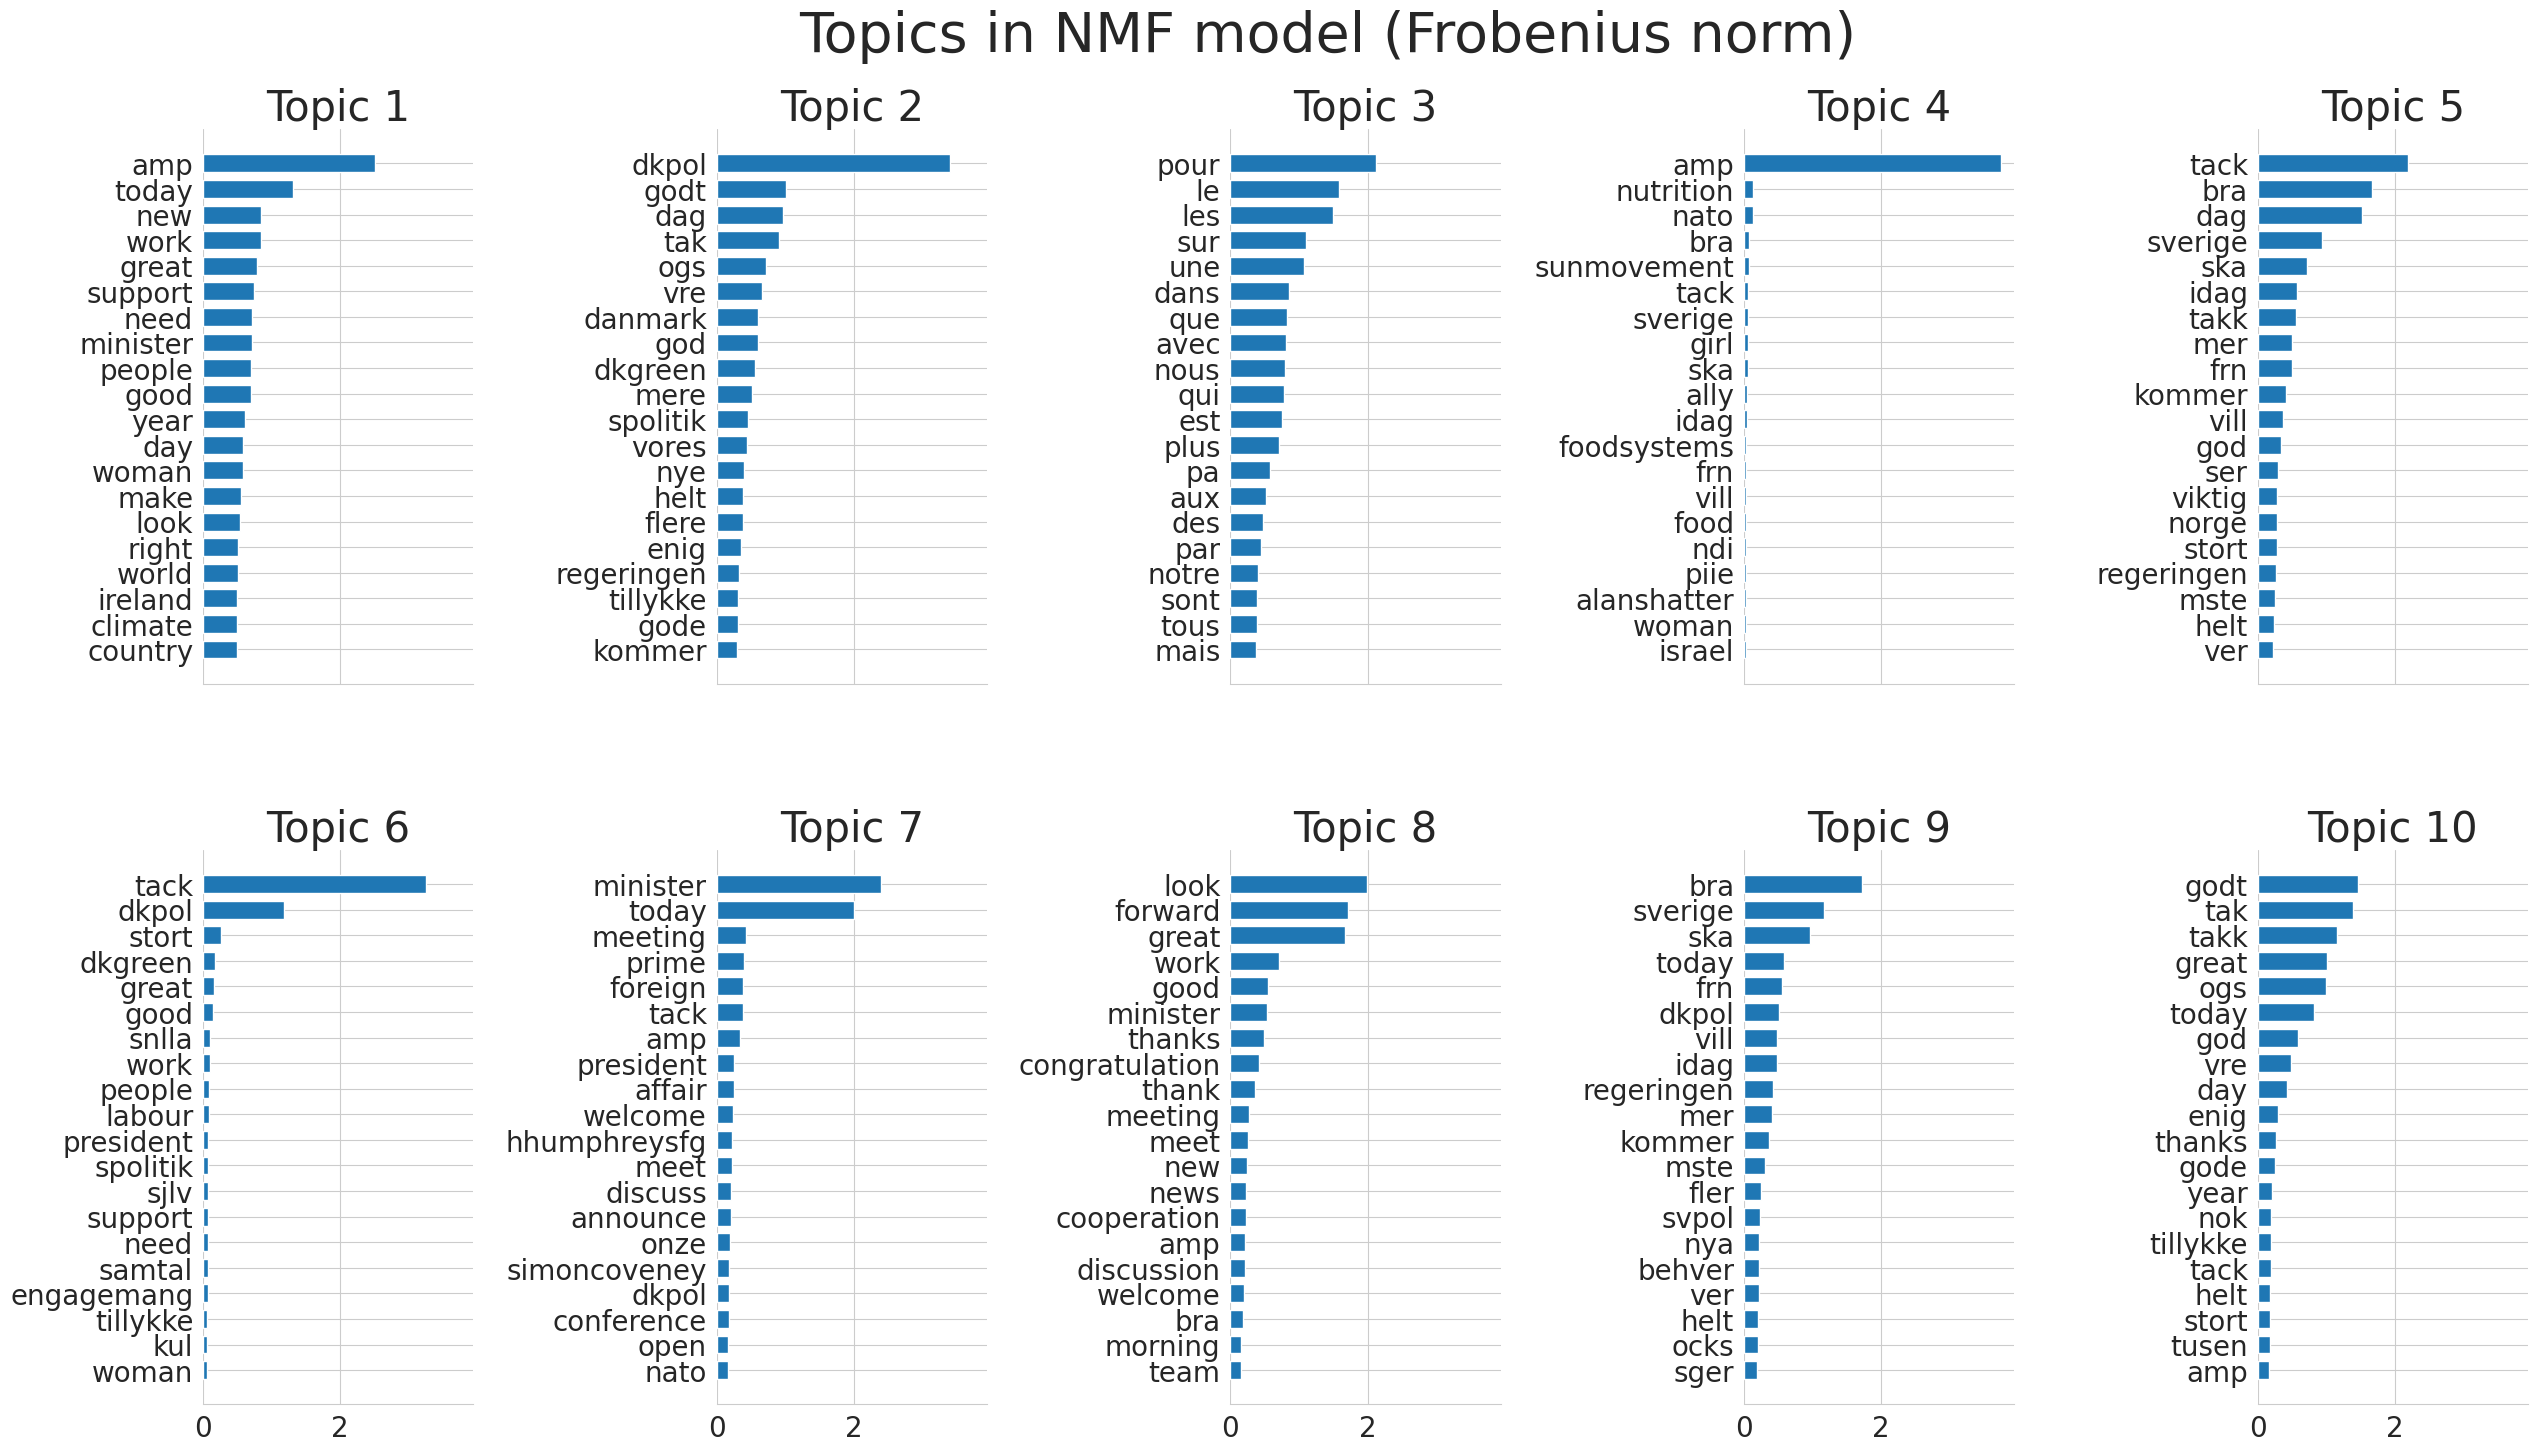



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 205.944s.


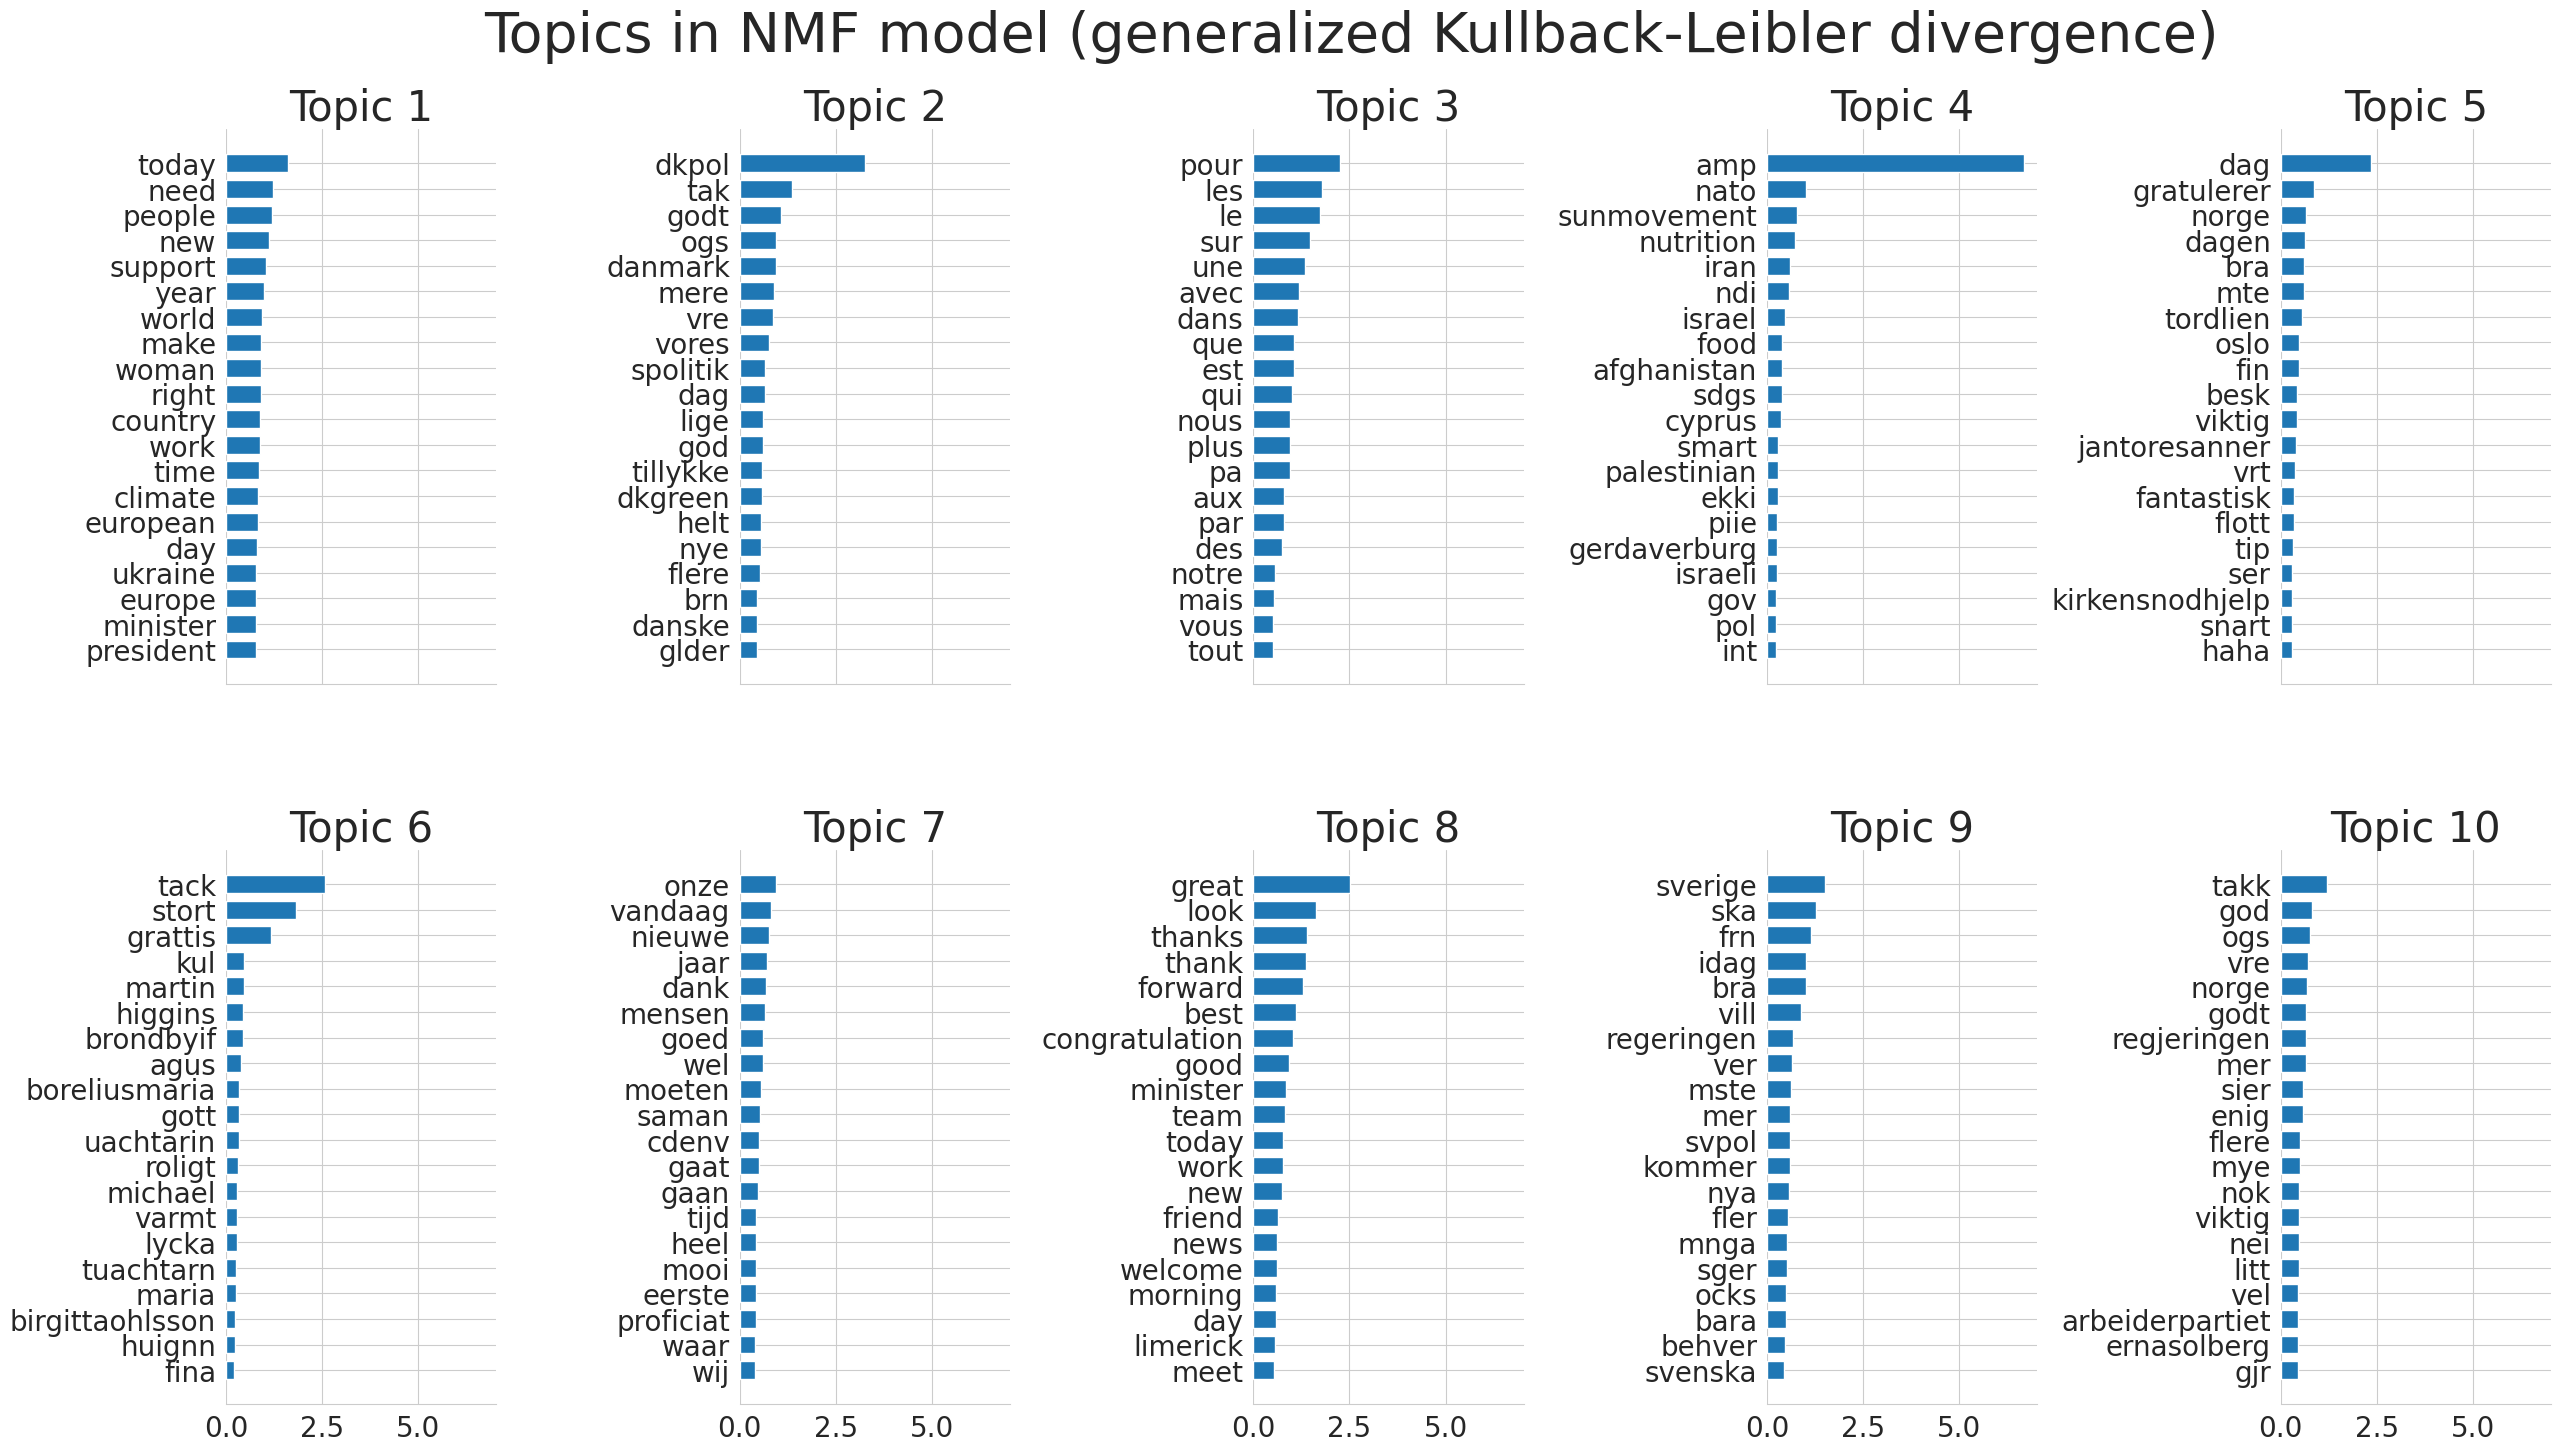



 Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 897.303s.


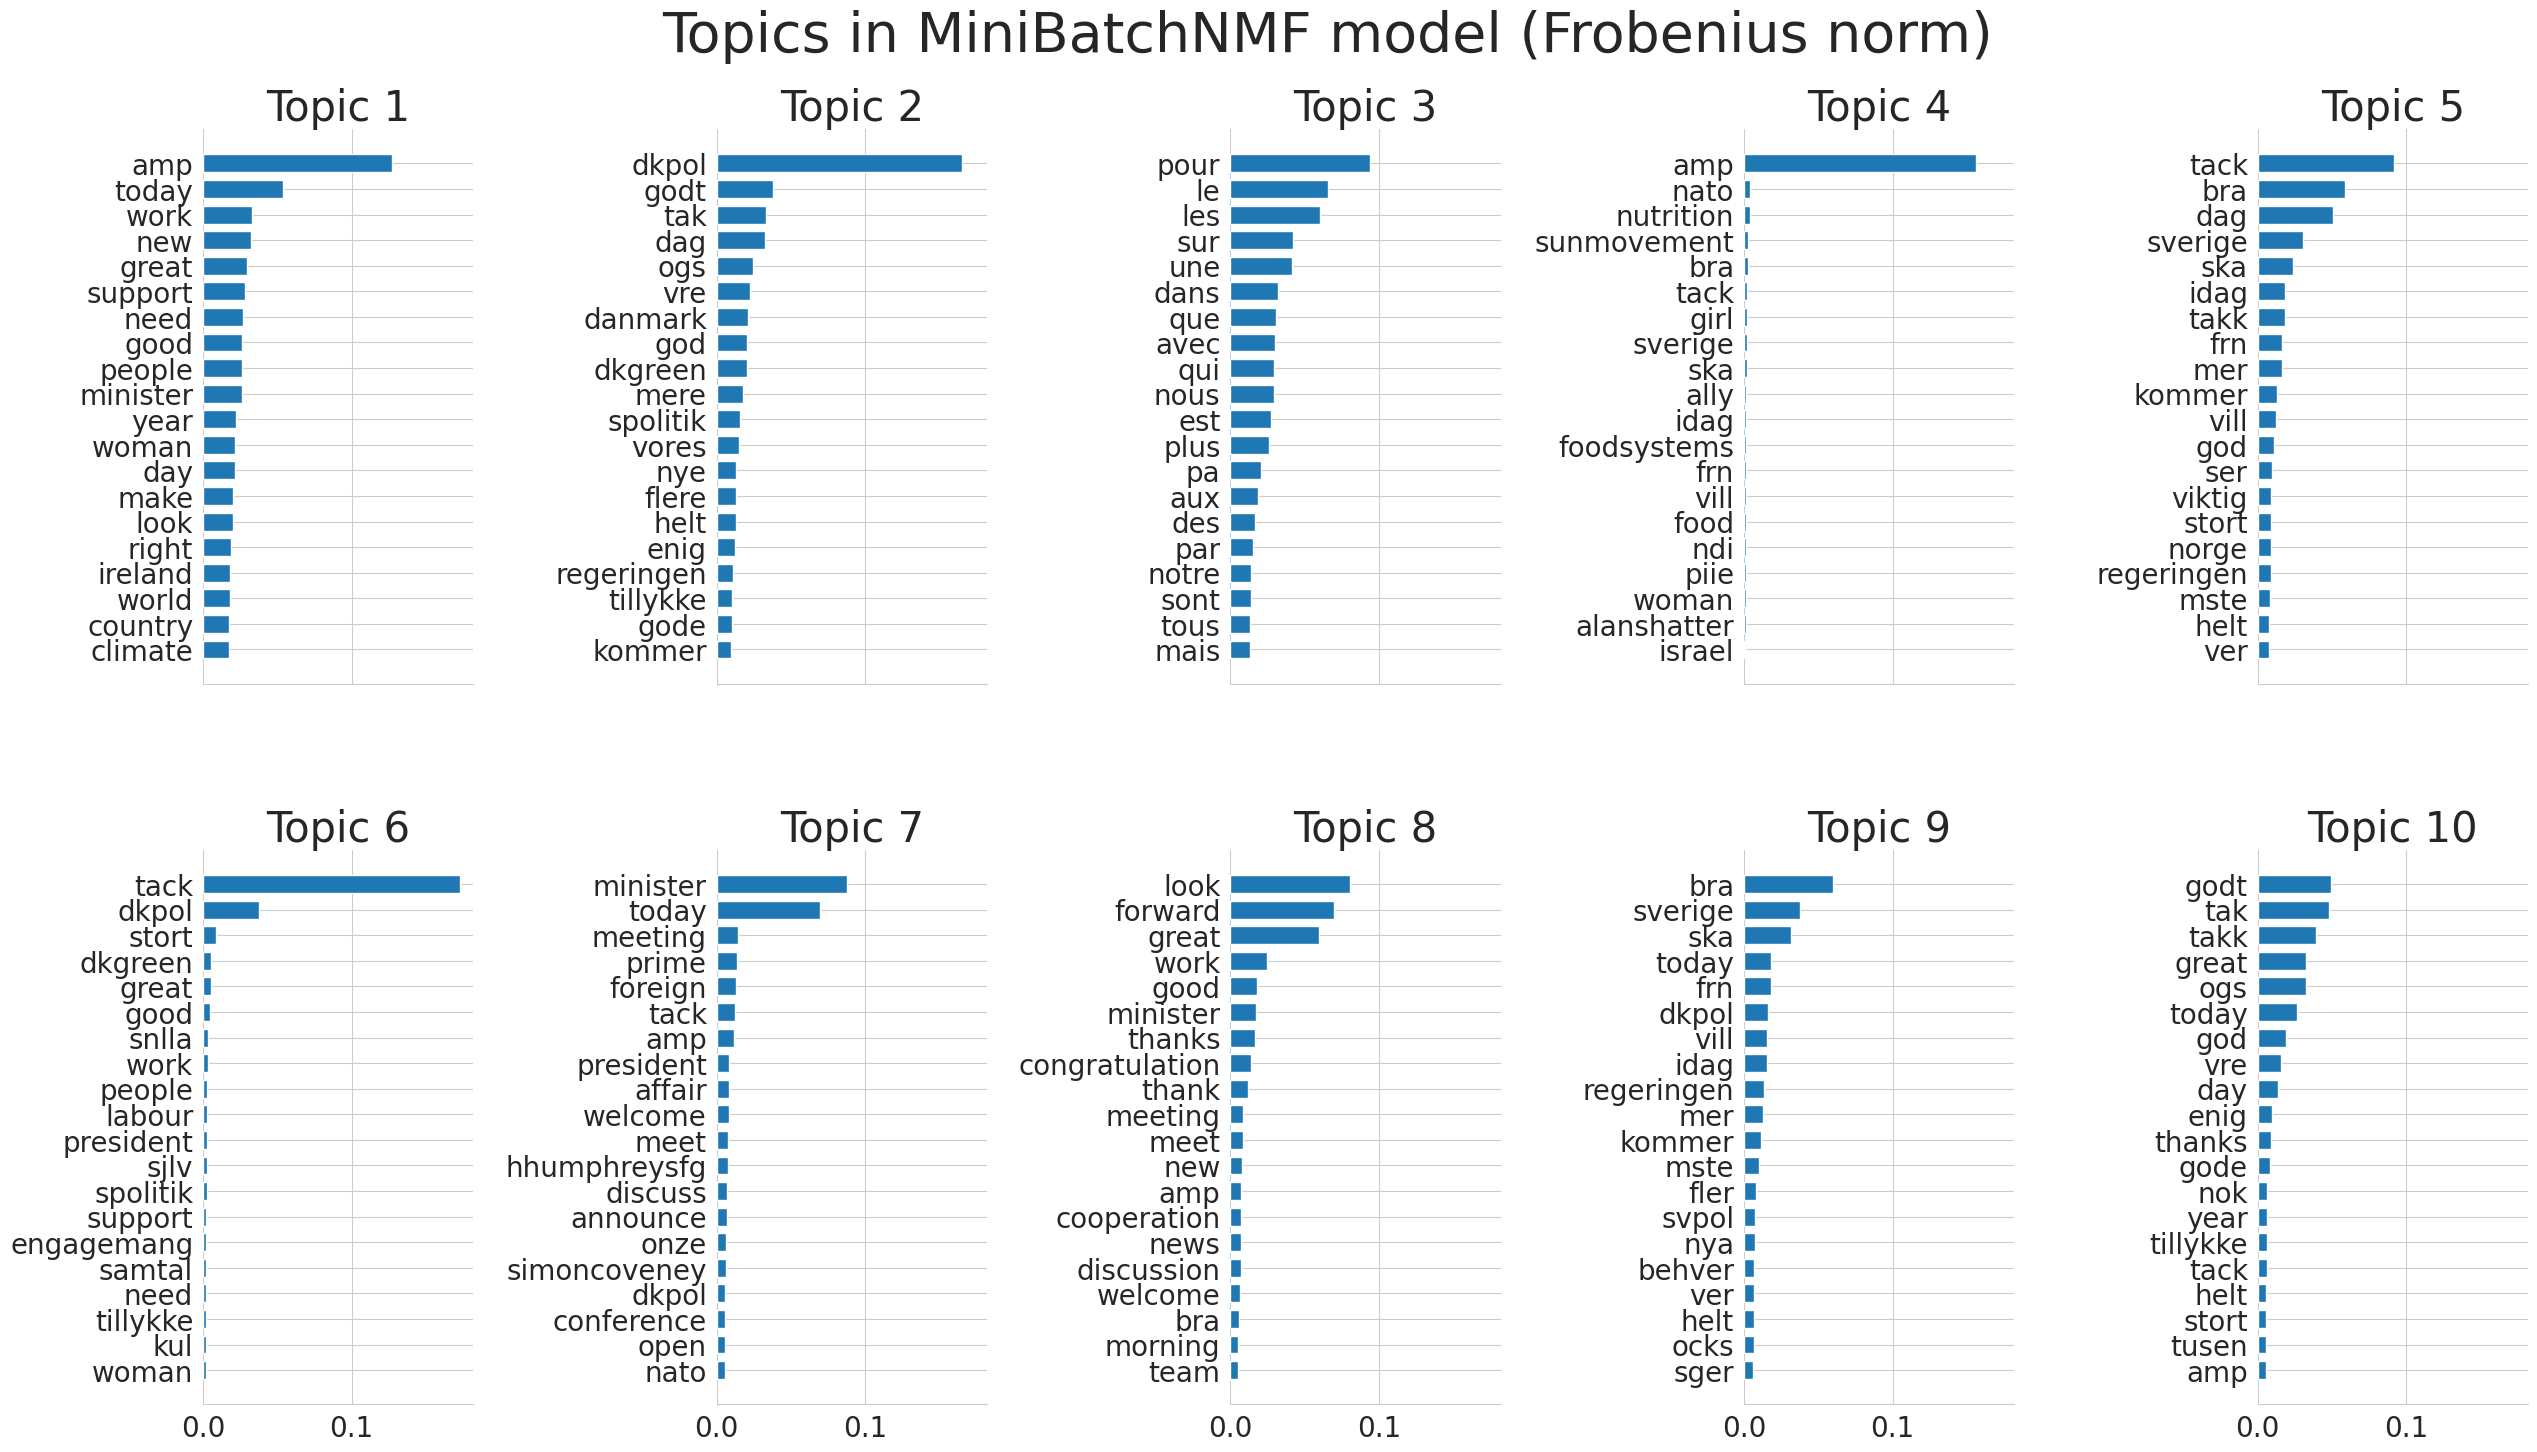



 Fitting the MiniBatchNMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 11.939s.


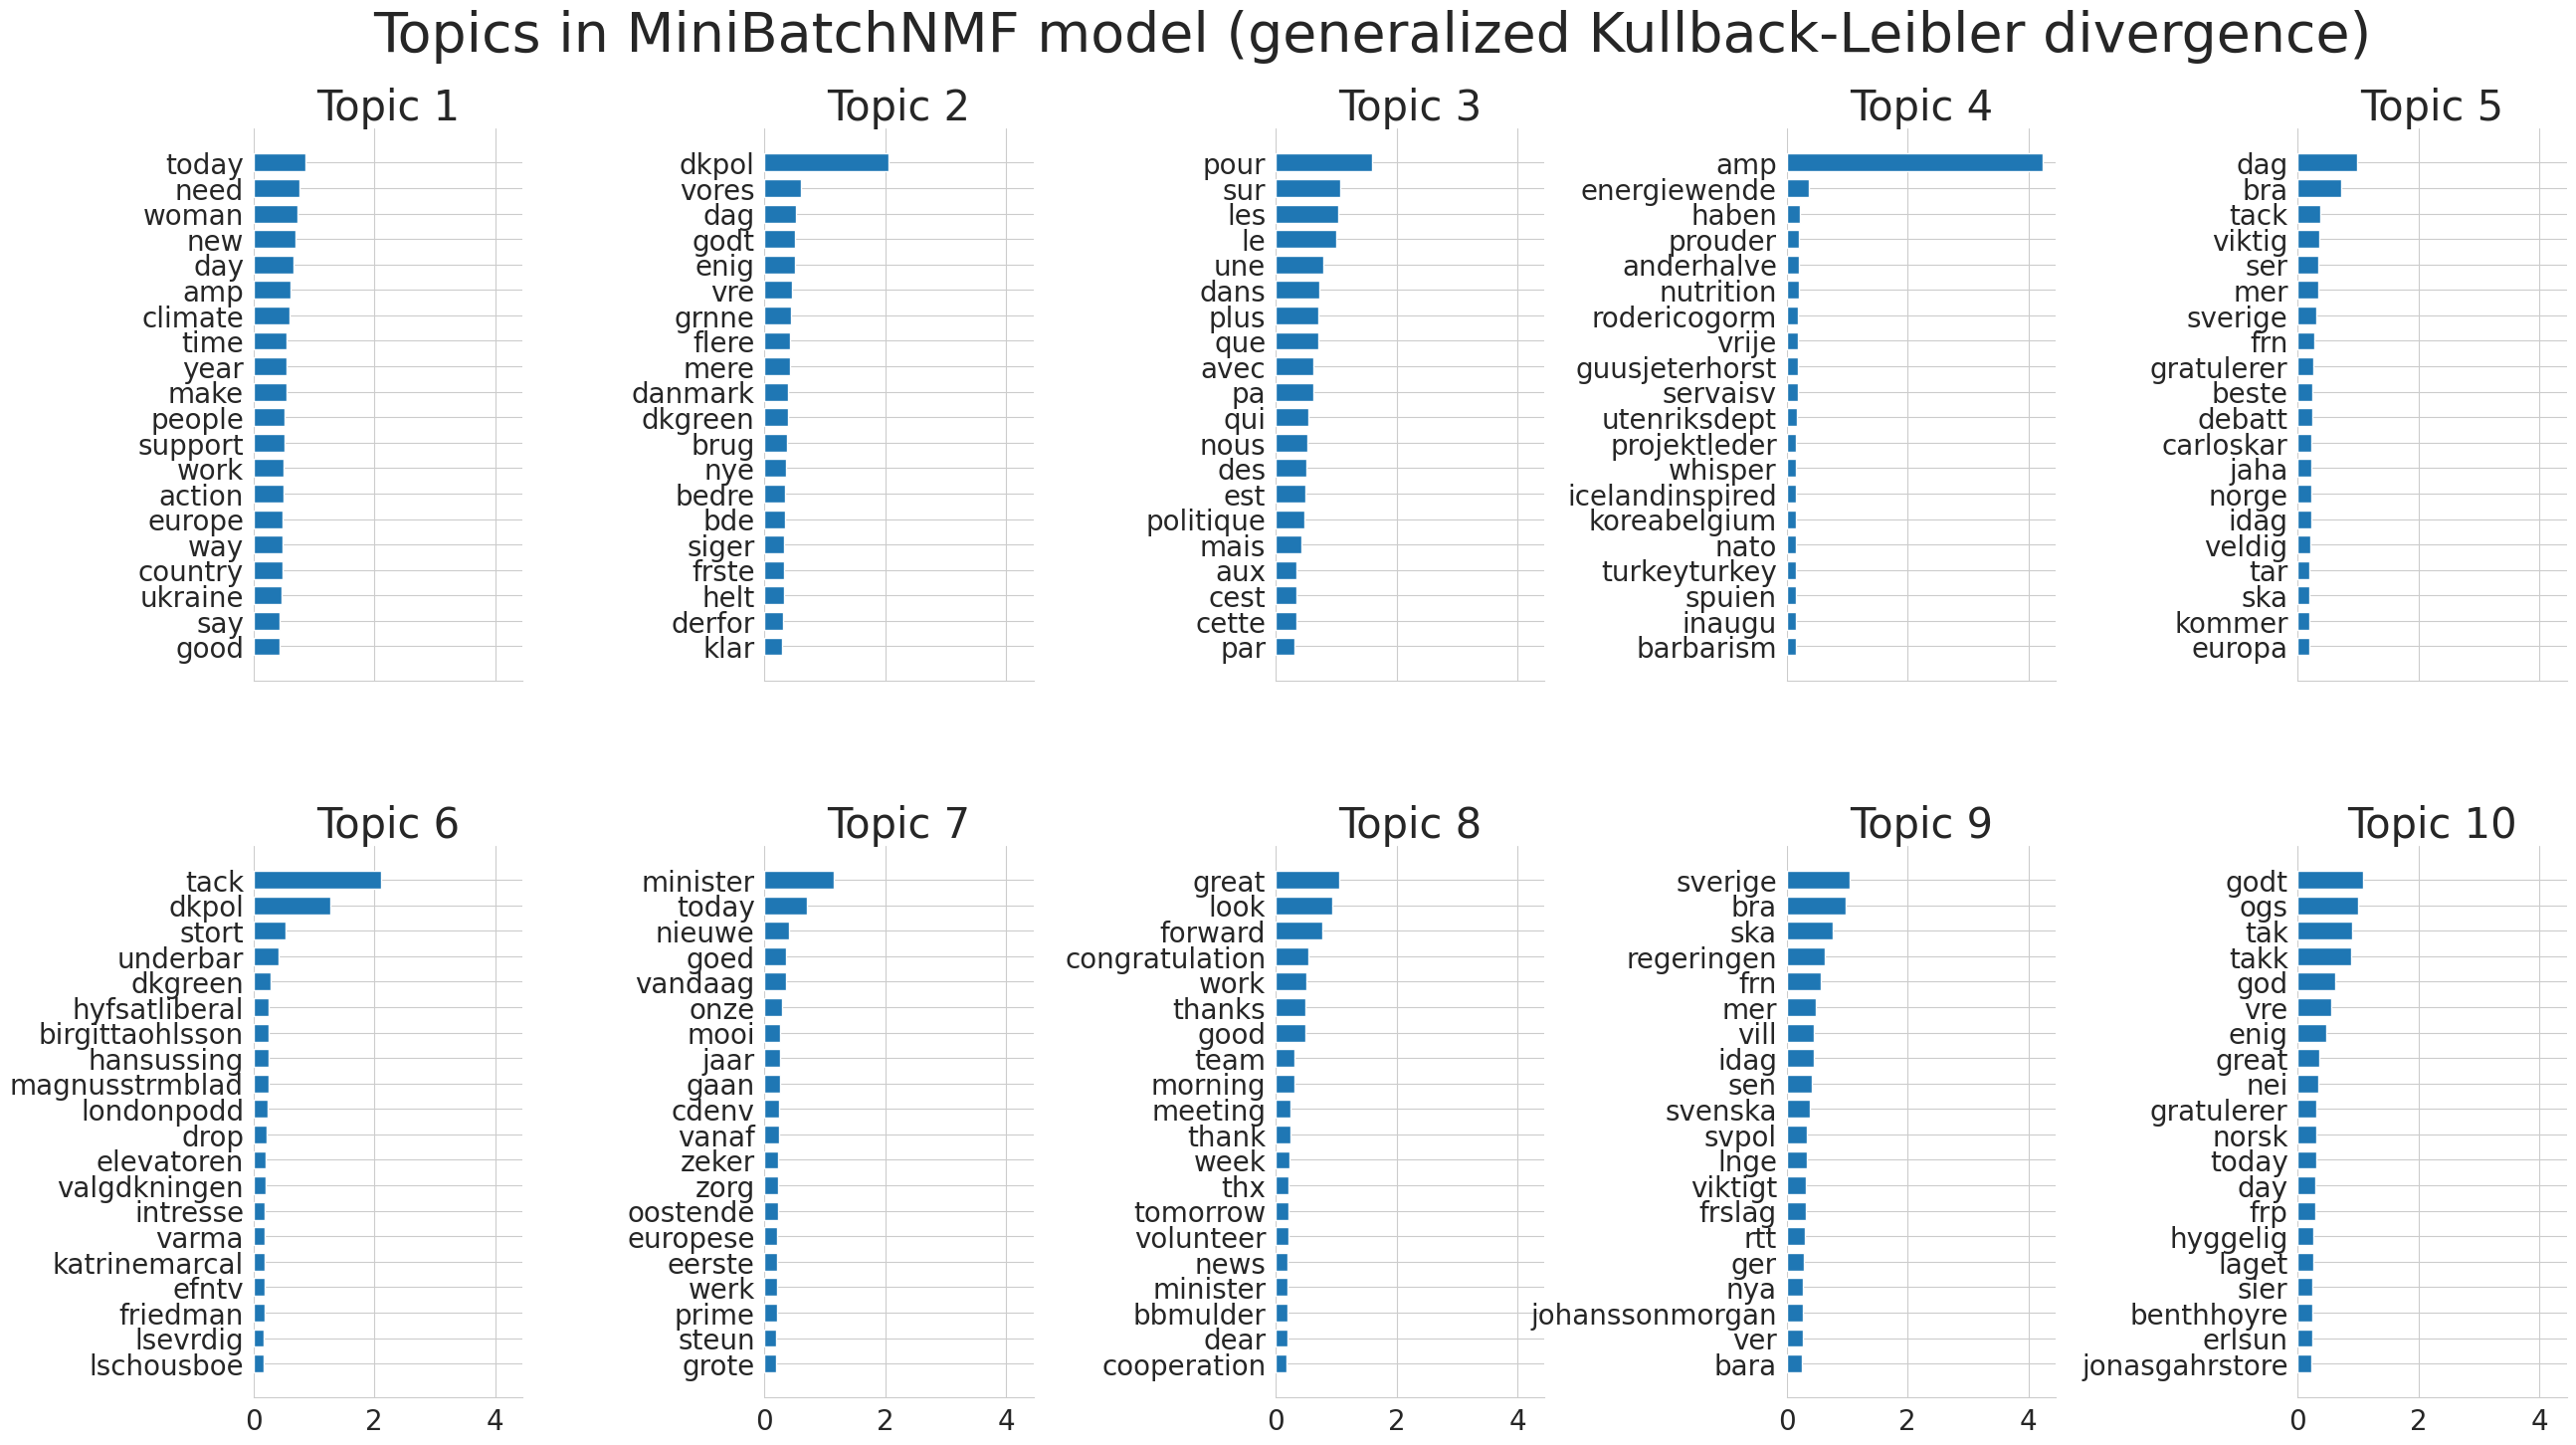



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 162.517s.


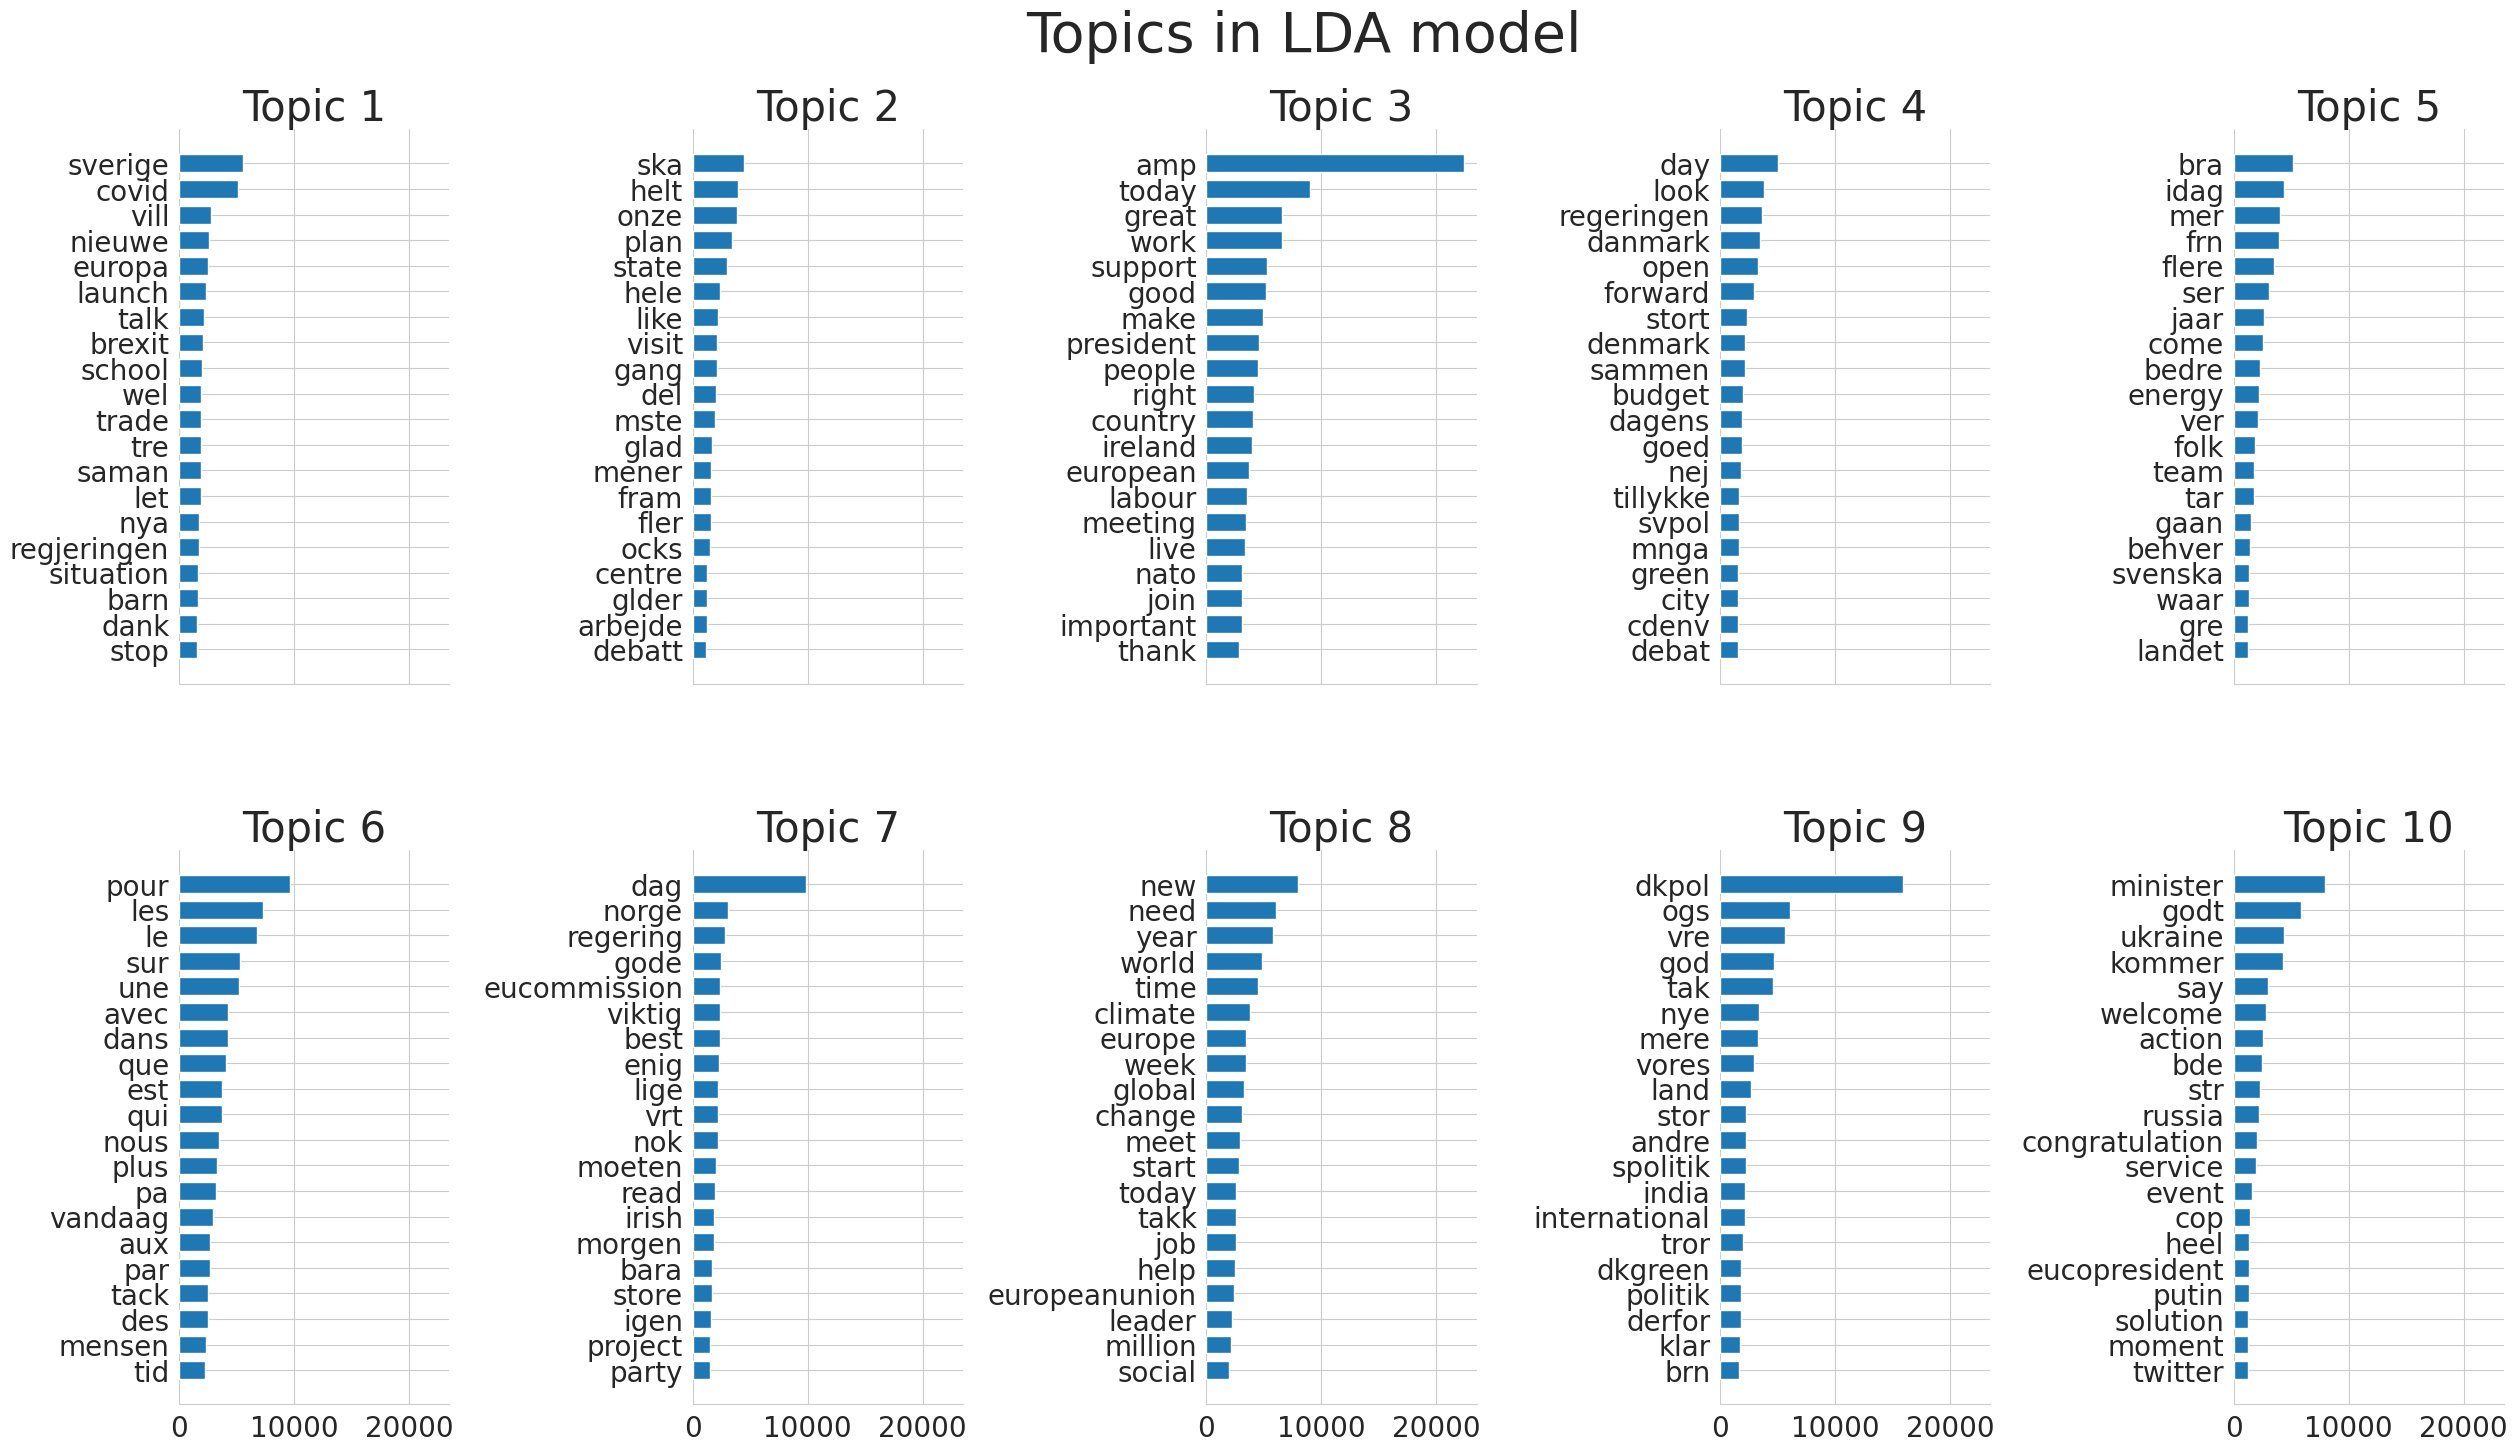

In [17]:
from time import time
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


df = pd.read_csv('/content/drive/MyDrive/Capstone_project/final_cleaned_data.csv')
df = df.fillna('')

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

print("Loading dataset...")
t0 = time()


data_samples = df['lemmatized_text']


print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
    "features, n_samples=%d and n_features=%d, batch_size=%d..."
    % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)


print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
    "batch_size=%d..." % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="kullback-leibler",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

The various iterations of Non-negative Matrix Factorization (NMF) yielded analogous yet subtly distinct outcomes. A comparative analysis of the graphical representations reveals disparities in the magnitude of values across these variants. Furthermore, there were instances where the hierarchy of the most prominent words was altered.

In contrast, Latent Dirichlet Allocation (LDA) produced markedly divergent results. However, when viewed from a holistic standpoint, both categories of topic analysis models - NMF and LDA - culminated in the generation of comparable topics. Despite the differences in their individual results, their overarching thematic outputs exhibited a degree of similarity.

#Kaggle Code Starts

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [34]:

import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Capstone_project/training_data.xlsx')

In [36]:
df.head(10)

,hashtags,full_text,in_reply_to_screen_name,country_user,gender_user,pol_spec_user
0,feminist AskMeAnything,b'RT @swedennewyork: What does it mean to have...,NaN,sweden,Male,Left
1,NaN,b'Jens Stoltenberg \xc3\xa5pnet virtuelle Rock...,NaN,norway,Male,Left
2,NaN,b'@Panenka_Bart Veel beterschap Bart en Loes! ...,BartDerwael,belgium,Male,Left
3,NaN,b'RT @CarlEmilLind: Tydelige S aftryk: \n\nPsk...,NaN,denmark,Female,Left
4,NaN,b'\xf0\x9f\x98\x83 https://t.co/bpqoZ8Y4wm',NaN,sweden,Male,Left
5,NaN,b'Idag togs f\xc3\xb6rsta spadtaget i Kigali f...,NaN,sweden,Male,Left
6,NaN,"b'RT @socialdep: ""Alla ska kunna lita p\xc3\xa...",NaN,sweden,Female,Left
7,NaN,b'@listighjort Jeg har tidligere v\xc3\xa6ret ...,listighjort,denmark,Female,Left
8,NaN,"b'RT @Utbdep: Fem l\xc3\xa4ros\xc3\xa4ten, @um...",NaN,sweden,Female,Left
9,Cyprus,b'RT @cyprusmail: \xe2\x80\x98No timeframes\xe...,NaN,norway,Male,Left


In [37]:
import re
import emoji
import nltk
from nltk.corpus import stopwords

# Download the stopwords list
nltk.download('stopwords')

# Load stopwords for the relevant languages
languages = ['english', 'dutch', 'danish', 'norwegian', 'swedish']

stop_words = set()
for lang in languages:
    stop_words.update(stopwords.words(lang))

def tweet_cleaner(text):
    # decode byte string
    if text.startswith("b'") or text.startswith('b"'):
        text = text[1:].strip("'\"")
        try:
            text = bytes(text, "latin-1").decode("unicode_escape").encode('latin-1').decode('utf-8')
        except:
            pass

    # Demojize: Convert emojis to their word representation
    text = emoji.demojize(text)

    # Remove word representations of emojis
    emoji_pattern = re.compile(r'(:[a-z_]+:)') # Matches ":word_here:"
    text = emoji_pattern.sub('', text)

    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Handle RT prefix
    text = re.sub(r'^RT[\s]+', '', text)

    # Remove all non-word characters (everything except numbers and letters)
    text = re.sub(r'[^\w\s]', '', text)

    # Remove non-English characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Lowercasing
    text = text.lower()

    # Remove stopwords and words shorter than 3 characters
    text = ' '.join([word for word in text.split() if word not in stop_words and len(word) > 2])

    # Handle whitespace
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

##Tags the words in the tweets
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return(wordnet.ADJ)
    elif nltk_tag.startswith('V'):
        return(wordnet.VERB)
    elif nltk_tag.startswith('N'):
        return(wordnet.NOUN)
    elif nltk_tag.startswith('R'):
        return(wordnet.ADV)
    else:
        return(None)

##Lemmatizes the words in tweets and returns the cleaned and lemmatized tweet
def lemmatize_tweet(tweet):
    #tokenize the tweet and find the POS tag for each token
    tweet = tweet_cleaner(tweet) #tweet_cleaner() will be the function you will write
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(tweet))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_tweet = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_tweet.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_tweet.append(lemmatizer.lemmatize(word, tag))
    return(" ".join(lemmatized_tweet))

In [39]:
from tqdm import tqdm
tqdm.pandas()

# Applying the lemmatization function with tqdm for progress
df['lemmatized_text'] = df['full_text'].progress_apply(lemmatize_tweet)

100%|██████████| 407223/407223 [13:14<00:00, 512.45it/s]


In [41]:
# Save DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Capstone_project/final_cleaned_data.csv', index=False)

##Model Building

Logistic Regression

In [42]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_project/final_cleaned_data.csv')

In [43]:
# Drop the first three columns by their position
df = df.drop(df.columns[[0, 1, 2]], axis=1)

In [44]:
# Count the number of rows with NaN values in 'lemmatized_text' column
nan_rows_count = df['lemmatized_text'].isna().sum()
print(f"Number of rows with NaN values in 'lemmatized_text': {nan_rows_count}")

# Drop the rows with NaN values in 'lemmatized_text' column
df = df.dropna(subset=['lemmatized_text'])

Number of rows with NaN values in 'lemmatized_text': 2402


In [45]:
# Drop the rows with empty strings in 'lemmatize_text' column
df = df[df['lemmatized_text'] != ""]

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop('pol_spec_user', axis=1)
y = df['pol_spec_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# One-hot encode the columns
X_train_encoded = pd.get_dummies(X_train, columns=['country_user', 'gender_user'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['country_user', 'gender_user'], drop_first=True)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train_encoded['lemmatized_text'])
X_test_text = vectorizer.transform(X_test_encoded['lemmatized_text'])

In [49]:
import scipy

# Drop the lemmatized_text column as its information is now in the vectorized form
X_train_encoded = X_train_encoded.drop('lemmatized_text', axis=1)
X_test_encoded = X_test_encoded.drop('lemmatized_text', axis=1)

# Combine for training data
X_train_final = scipy.sparse.hstack((X_train_text, X_train_encoded.values), format='csr')

# Combine for test data
X_test_final = scipy.sparse.hstack((X_test_text, X_test_encoded.values), format='csr')

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression(max_iter=10000, solver='newton-cg')
classifier.fit(X_train_final, y_train)

# Predictions
y_pred = classifier.predict(X_test_final)

In [51]:
# Print the classification report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      Center       0.77      0.63      0.70     20908
 Independent       0.87      0.41      0.56       129
        Left       0.73      0.83      0.77     34781
       Right       0.75      0.72      0.73     25147

    accuracy                           0.74     80965
   macro avg       0.78      0.65      0.69     80965
weighted avg       0.75      0.74      0.74     80965

0.7435188044216637


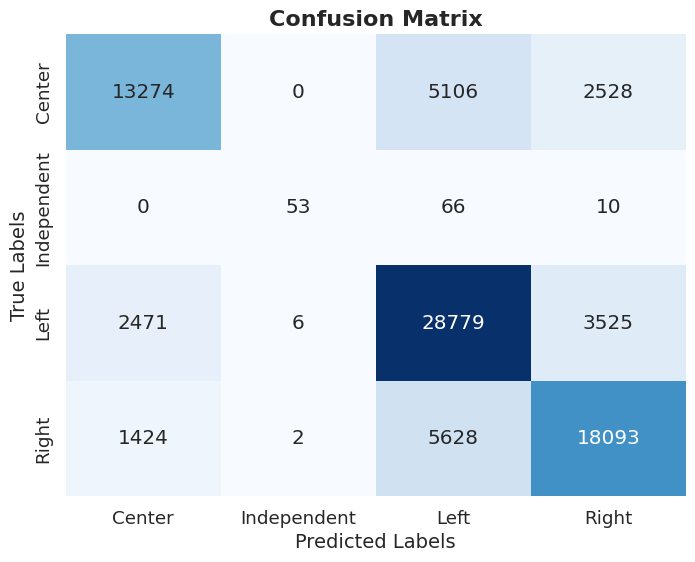

In [52]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels
class_names = np.unique(np.concatenate((y_test, y_pred)))

# Create confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16, weight='bold')
plt.show()

In [53]:
print("Accuracy is ", accuracy_score(y_test, y_pred))

Accuracy is  0.7435188044216637


Without Train Test Split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_project/final_cleaned_data.csv')


# Drop the first three columns by their position
df = df.drop(df.columns[[0, 1, 2]], axis=1)


# Count the number of rows with NaN values in 'lemmatized_text' column
nan_rows_count = df['lemmatized_text'].isna().sum()
print(f"Number of rows with NaN values in 'lemmatized_text': {nan_rows_count}")

# Drop the rows with NaN values in 'lemmatized_text' column
df = df.dropna(subset=['lemmatized_text'])

# Drop the rows with empty strings in 'lemmatize_text' column
df = df[df['lemmatized_text'] != ""]


from sklearn.model_selection import train_test_split

X = df.drop('pol_spec_user', axis=1)
y = df['pol_spec_user']

In [ ]:
import pandas as pd
import scipy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#Load and preprocess the entire dataset


X_encoded = pd.get_dummies(X, columns=['country_user', 'gender_user'], drop_first=True)

vectorizer = TfidfVectorizer()

# Use fit_transform on the entire dataset
X_text = vectorizer.fit_transform(X_encoded['lemmatized_text'])

# Drop the lemmatized_text column
X_encoded = X_encoded.drop('lemmatized_text', axis=1)

# Combine for the full dataset
X_final = scipy.sparse.hstack((X_text, X_encoded.values), format='csr')

# Train the model on the entire dataset

classifier = LogisticRegression(max_iter=10000, solver='newton-cg')
classifier.fit(X_final, y)

##Test Data Predictions

In [ ]:
test_data = pd.read_excel('/content/drive/MyDrive/Capstone_project/test_data.xlsx')

In [ ]:
from tqdm import tqdm
tqdm.pandas()

# Applying the lemmatization function with tqdm for progress
test_data['lemmatized_text'] = test_data['full_text'].progress_apply(lemmatize_tweet)

In [ ]:
test_df = test_data

In [ ]:
test_ids = test_df['Id']
test_df = test_df.drop(columns=['Id', 'pol_spec_user'])

In [ ]:
# Drop the first three columns by their position
test_df = test_df.drop(test_df.columns[[0, 1, 2]], axis=1)

# Count and drop NaN values in 'lemmatized_text' column
nan_rows_count = test_df['lemmatized_text'].isna().sum()
print(f"Number of rows with NaN values in 'lemmatized_text': {nan_rows_count}")
test_df = test_df.dropna(subset=['lemmatized_text'])


# One-hot encode the columns
test_encoded = pd.get_dummies(test_df, columns=['country_user', 'gender_user'], drop_first=True)

# Transform using the vectorizer (Note: Only transform, don't fit)
test_text = vectorizer.transform(test_encoded['lemmatized_text'])

# Drop the lemmatized_text column
test_encoded = test_encoded.drop('lemmatized_text', axis=1)

# Combine the data for the test set
test_final = scipy.sparse.hstack((test_text, test_encoded.values), format='csr')

In [ ]:
predictions = classifier.predict(test_final)

In [ ]:
submission_df = pd.DataFrame({
    'Id': test_ids,
    'pol_spec_user': predictions
})

In [ ]:
submission_df.to_csv('/content/drive/MyDrive/Capstone_project/submissions.csv', index=False)

#Kaggle code ends